Make_Dataset.py

In [177]:
# Import pandas
import pandas as pd
import pandas_profiling

#  The features of Table Acquisition
col_acq = ['LoanID','Channel','SellerName','OrInterestRate','OrUnpaidPrinc','OrLoanTerm',
            'OrDate','FirstPayment','OrLTV','OrCLTV','NumBorrow','DTIRat','CreditScore',
            'FTHomeBuyer','LoanPurpose','PropertyType','NumUnits','OccStatus','PropertyState',
            'Zip','MortInsPerc','ProductType','CoCreditScore','MortInsType','RelMortInd']

#  The features of Table Performance
col_per = ['LoanID','MonthRep','Servicer','CurrInterestRate','CAUPB','LoanAge','MonthsToMaturity',
              'AdMonthsToMaturity','MaturityDate','MSA','CLDS','ModFlag','ZeroBalCode','ZeroBalDate',
              'LastInstallDate','ForeclosureDate','DispositionDate','PPRC','AssetRecCost','MHRC',
              'ATFHP','NetSaleProceeds','CreditEnhProceeds','RPMWP','OFP','NIBUPB','PFUPB','RMWPF',
              'FPWA','ServicingIndicator']

linesToRead = 2000

aquisition_frame = pd.read_csv('C:/Users/bebxadvberb/Documents/AI/Trusted AI/Acquisition_2007Q4.txt', sep='|', names=col_acq, nrows= linesToRead)
performance_frame = pd.read_csv('C:/Users/bebxadvberb/Documents/AI/Trusted AI/Performance_2007Q4.txt', sep='|', names=col_per, index_col=False, nrows = linesToRead) 

# performance_frame.drop_duplicates(subset='LoanID', keep='last', inplace=True)

# Merge the two DF's together using inner join
df = pd.merge(aquisition_frame, performance_frame, on = 'LoanID', how='inner')

In [178]:
def makeDateNumeric(text):
    numMonths = int(text[:2])
    numYears = int(text[3:7])
    result = (numYears - 2000)*12 + numMonths
    return result

def makeDayNumeric(text):
    numMonths = int(text[3:5])
    numYears = int(text[6:10])
    result = (numYears - 2000)*12 + numMonths
    return result


def build_features(df):
    # Define the DEFAULT FLAG
    df.rename(index=str, columns={'ForeclosureDate': 'Default'}, inplace=True)
    df['Default'].fillna(0, inplace=True)
    df.loc[df['Default'] != 0, 'Default'] = 1  
    df['Default'] = df['Default'].astype(int)

    # REMOVE CONSTANT FEATURES (see profile-report)
    df.drop(['ProductType', 'ServicingIndicator'], axis=1)

    # REMOVE FEATURES WITH MORE THAN 90% MISSING VALUES
    
    
    
    # GET DATA WITH ONLY NUMERICAL FEATURES
    num_feat = df.select_dtypes(include=['int32','int64','float64']).columns

    # CATEGORICAL FEATURES
    obj_feat = df.select_dtypes(include='object').columns
    
    cat_feat = ['Channel', 'SellerName', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType','OccStatus', 'PropertyState', 'ProductType', 'RelMortInd', 'ModFlag']
    
    
    
    
    # TRANSFORM DATES TO NUMBER OF MONTHS (STARTING FROM 01/2000)
    df['MonthRep'] = df['MonthRep'].apply(makeDayNumeric)
    df['OrDate'] = df['OrDate'].apply(makeDateNumeric)
    df['FirstPayment'] = df['FirstPayment'].apply(makeDateNumeric)
    df['MaturityDate'] = df['MaturityDate'].apply(makeDateNumeric)


    # SPLIT INPUT AND TARGET VARIABLES
    y = df[['Default']]
    X = df.drop(['Default'], axis=1)

In [179]:
build_features(df)

In [180]:
num_feat = df.select_dtypes(include=['int32','int64','float64']).columns

# CATEGORICAL FEATURES
obj_feat = df.select_dtypes(include='object').columns

cat_feat = ['CLDS', 'Channel', 'SellerName', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType','OccStatus', 'PropertyState', 'ProductType', 'RelMortInd', 'ModFlag']

df_to_check = df.drop(num_feat, axis=1).drop(cat_feat, axis=1)

In [184]:
df_to_check.head()

,Servicer,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
0,"BANK OF AMERICA, N.A.",NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [186]:
df_to_check.describe()

,Servicer,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
count,63,31,6,6,31
unique,18,29,6,6,2
top,OTHER,05/2009,09/01/2008,09/01/2009,N
freq,17,2,1,1,29


In [4]:
df['Default'].fillna(0, inplace=True)
df.loc[df['Default'] != 0, 'Default'] = 1  
df['Default'] = df['Default'].astype(int)

y = df[['Default']]
X = df.drop(['Default'], axis=1)

In [5]:
len(df[y['Default']==1])

39

In [139]:
print("Total amount of features:")
print(len(df.columns))

excl_int64 = df.select_dtypes(exclude=['int32','int64','float64']).columns
print(len(excl_int64))

obj_col = df.select_dtypes(include='object')

Total amount of features:
54
20


In [140]:
obj_col.head()

,Channel,SellerName,OrDate,FirstPayment,FTHomeBuyer,LoanPurpose,PropertyType,OccStatus,PropertyState,ProductType,RelMortInd,MonthRep,Servicer,MaturityDate,CLDS,ModFlag,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
0,C,"BANK OF AMERICA, N.A.",10/2007,12/2007,N,C,PU,P,CO,FRM,N,11/01/2007,"BANK OF AMERICA, N.A.",11/2037,0,N,NaN,NaN,NaN,NaN
1,C,"BANK OF AMERICA, N.A.",10/2007,12/2007,N,C,PU,P,CO,FRM,N,12/01/2007,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
2,C,"BANK OF AMERICA, N.A.",10/2007,12/2007,N,C,PU,P,CO,FRM,N,01/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
3,C,"BANK OF AMERICA, N.A.",10/2007,12/2007,N,C,PU,P,CO,FRM,N,02/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
4,C,"BANK OF AMERICA, N.A.",10/2007,12/2007,N,C,PU,P,CO,FRM,N,03/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN


In [82]:
cat_features = ['Channel', 'SellerName', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType','OccStatus', 'PropertyState', 'ProductType', 'RelMortInd']
dfLeft = obj_col.drop(cat_features,axis=1).head()
dfLeft

,OrDate,FirstPayment,MonthRep,Servicer,MaturityDate,CLDS,ModFlag,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
0,10/2007,12/2007,11/01/2007,"BANK OF AMERICA, N.A.",11/2037,0,N,NaN,NaN,NaN,NaN
1,10/2007,12/2007,12/01/2007,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
2,10/2007,12/2007,01/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
3,10/2007,12/2007,02/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
4,10/2007,12/2007,03/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN


In [83]:
numericDates = ['OrDate', 'FirstPayment', 'MonthRep', 'MaturityDate']
dfLeft

,OrDate,FirstPayment,MonthRep,Servicer,MaturityDate,CLDS,ModFlag,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
0,10/2007,12/2007,11/01/2007,"BANK OF AMERICA, N.A.",11/2037,0,N,NaN,NaN,NaN,NaN
1,10/2007,12/2007,12/01/2007,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
2,10/2007,12/2007,01/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
3,10/2007,12/2007,02/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN
4,10/2007,12/2007,03/01/2008,NaN,11/2037,0,N,NaN,NaN,NaN,NaN


In [ ]:
dfLeft['OrDate'] = dfLeft['OrDate'].apply(makeDateNumeric)

In [96]:
dfLeft['FirstPayment'] = dfLeft['FirstPayment'].apply(makeDateNumeric)

In [123]:
dfLeft['MonthRep'] = dfLeft['MonthRep'].apply(makeDayNumeric)

TypeError: 'int' object is not subscriptable

In [100]:
dfLeft['MaturityDate'] = dfLeft['MaturityDate'].apply(makeDateNumeric)

In [124]:
dfLeft

,OrDate,FirstPayment,MonthRep,Servicer,MaturityDate,CLDS,ModFlag,ZeroBalDate,LastInstallDate,DispositionDate,FPWA
0,94,96,85,"BANK OF AMERICA, N.A.",455,0,N,NaN,NaN,NaN,NaN
1,94,96,85,NaN,455,0,N,NaN,NaN,NaN,NaN
2,94,96,97,NaN,455,0,N,NaN,NaN,NaN,NaN
3,94,96,97,NaN,455,0,N,NaN,NaN,NaN,NaN
4,94,96,97,NaN,455,0,N,NaN,NaN,NaN,NaN


In [103]:
def makeDateNumeric(text):
    numMonths = int(text[:2])
    numYears = int(text[3:7])
    result = (numYears - 2000)*12 + numMonths
    return result

def makeDayNumeric(text):
    numMonths = int(text[3:5])
    numYears = int(text[6:10])
    result = (numYears - 2000)*12 + numMonths
    return result

text = "03/12/2007"
makeDayNumeric(text)

96

build_features.py

In [34]:
import seaborn as sns
df.describe()

,LoanID,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrLTV,OrCLTV,NumBorrow,DTIRat,CreditScore,NumUnits,...,MHRC,ATFHP,NetSaleProceeds,CreditEnhProceeds,RPMWP,OFP,NIBUPB,PFUPB,RMWPF,ServicingIndicator
count,2.000000e+04,20000.000000,20000.000000,20000.00000,20000.00000,20000.000000,20000.000000,19326.000000,19980.000000,20000.000000,...,24.000000,36.000000,35.000000,40.000000,15.000000,6.000000,28.000000,2003.000000,0.0,0.0
mean,1.004639e+11,6.512509,183833.100000,341.17460,73.75925,75.222100,1.484100,39.777450,705.125576,1.041100,...,1969.984167,2066.908889,4818.012571,114770.523250,50897.100667,132527.003333,4941.589643,12560.512716,NaN,NaN
std,2.640315e+08,0.393261,93571.290596,54.50247,14.77391,14.752547,0.516101,12.167749,67.999171,0.233909,...,1595.051617,4654.197036,5191.643429,70299.775551,23720.507019,36051.993968,9653.465344,30593.107652,NaN,NaN
min,1.000023e+11,5.310000,23000.000000,120.00000,20.00000,20.000000,1.000000,8.000000,570.000000,1.000000,...,200.000000,-2478.110000,511.570000,16166.580000,11760.170000,76948.840000,12.360000,0.000000,NaN,NaN
25%,1.002608e+11,6.250000,108000.000000,360.00000,67.00000,69.000000,1.000000,31.000000,647.000000,1.000000,...,967.500000,-278.905000,1531.935000,57451.852500,32152.520000,112626.557500,903.492500,0.000000,NaN,NaN
50%,1.004682e+11,6.500000,167000.000000,360.00000,79.00000,80.000000,1.000000,41.000000,706.000000,1.000000,...,1500.000000,1117.245000,3497.570000,100113.930000,51951.520000,137365.225000,1441.010000,0.000000,NaN,NaN
75%,1.006997e+11,6.750000,238000.000000,360.00000,80.00000,86.000000,2.000000,49.000000,767.000000,1.000000,...,2200.000000,2126.207500,5252.180000,166551.260000,65471.875000,159340.930000,4461.845000,0.000000,NaN,NaN
max,1.009291e+11,7.750000,485000.000000,360.00000,97.00000,97.000000,3.000000,64.000000,822.000000,4.000000,...,6000.000000,25107.250000,25997.790000,290874.520000,104519.570000,172436.230000,47774.010000,135445.800000,NaN,NaN


In [10]:
df['Default'].fillna(0, inplace=True)
df.loc[df['Default'] != 0, 'Default'] = 1  
df['Default'] = df['Default'].astype(int)

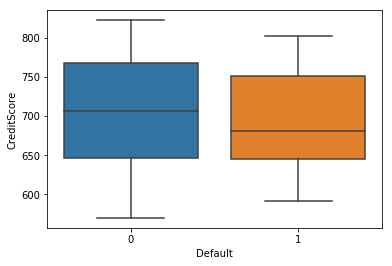

In [35]:
sns.boxplot(x= "Default" , y= "CreditScore", data = df)

In [36]:
from sklearn.cross_validation import train_test_split

train, test = train_test_split(df, test_size = 0.2, stratify=df['Default'])

C:\Users\bebxadvberb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
y = merged_frame['Default'] 
X = merged_frame.drop(['Default'], axis=1) 
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Default, dtype: int64

In [4]:
merged_frame = pd.merge(aquisition_frame, performance_frame, on = 'LoanID', how='inner')
merged_frame.rename(index=str, columns={'ForeclosureDate': 'Default'}, inplace=True)  
merged_frame['Default'].fillna(0, inplace=True)
merged_frame.loc[merged_frame['Default'] != 0, 'Default'] = 1  
merged_frame['Default'] = merged_frame['Default'].astype(int)
loc_LoanID = merged_frame.columns.get_loc('LoanID') 
loc_LoanID

,LoanID,Channel,SellerName,OrInterestRate,OrUnpaidPrinc,OrLoanTerm,OrDate,FirstPayment,OrLTV,OrCLTV,...,ATFHP,NetSaleProceeds,CreditEnhProceeds,RPMWP,OFP,NIBUPB,PFUPB,RMWPF,FPWA,ServicingIndicator
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,343000,360,10/2007,12/2007,86,86.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,400000,360,10/2007,12/2007,62,62.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,100008184591,B,OTHER,6.625,81000,360,11/2007,01/2008,64,82.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,100008870761,B,AMTRUST BANK,6.500,119000,360,11/2007,01/2008,71,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,205000,360,10/2007,12/2007,27,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [ ]:
df = pd.read_csv('C:/Users/bebxadvberb/PycharmProjects/ML4Credit/POC PD modelling/merged_df.csv')


df.rename(index=str, columns={'ForeclosureDate': 'Default'}, inplace=True)


LoanID              391209
CurrInterestRate    391209
LoanAge             391209
MonthsToMaturity    391209
ForeclosureDate      35316
dtype: int64

,LoanID,Channel,SellerName,OrInterestRate,OrLTV,NumBorrow,DTIRat,CreditScore,FTHomeBuyer,LoanPurpose,PropertyType,CurrInterestRate,LoanAge,MonthsToMaturity,Default
0,100002296854,C,"BANK OF AMERICA, N.A.",6.625,86,2.0,27.0,751.0,N,C,PU,6.625,14,346,0
1,100006876815,C,"BANK OF AMERICA, N.A.",6.250,62,2.0,35.0,804.0,N,P,SF,6.250,69,291,0
2,100008184591,B,OTHER,6.625,64,1.0,53.0,585.0,N,R,SF,5.000,132,228,0
3,100008870761,B,AMTRUST BANK,6.500,71,1.0,35.0,646.0,N,R,CO,6.500,96,264,0
4,100013284158,B,"BANK OF AMERICA, N.A.",6.625,27,1.0,54.0,591.0,N,C,SF,4.250,133,420,0


0

In [39]:
    """
        Make all data numeric. 
        Find colunms that have string data:
    """
    n_samples_init = len(merged_frame)
    if col_acq_subset != extended_selec_acq:
        """
        Do this to ensure we get the same number of samples in the dataframe as when using the extended selection. 
        When using less features, we may end up with less rows dropped by the .dropna() function causing us to 
        have uncomparable results (as initial datasets are not the same).
        """
        merged_frame = merged_frame.iloc[np.load('extended_selection_merged_frame_indices.npy')]
    merged_frame = merged_frame.dropna()
    n_samples_without_na = len(merged_frame)
    # print_dropped_sample_count(n_samples_init, n_samples_without_na)
    # (merged_frame, categorical_data, dummy_cols) = getdummies(merged_frame)
    # cat_cols = categorical_data.columns.values
    
    ###################################################################################################################
    
    """
        Set the plotting stats.
    """
    sns.set()
    sns.set_context("paper", font_scale=1.5)
    sns.set_style("darkgrid", {'font.family': ['EYInterstate']})   
    
    ###################################################################################################################

    """
        Split the target variable from the input variables.
    """ 
    y = merged_frame['Default']
    X = merged_frame.drop(['Default'], axis=1)
    

In [ ]:
    """
        Label-encode the categorical collumns.
    """
    X.reset_index(drop=True, inplace=True)
    categorical_data = categorical_data.apply(LabelEncoder().fit_transform)
    categorical_data.reset_index(drop=True, inplace=True)
    
    """
    Concatenate the categorical data back to pass it on to the train_test_splitter 
    (remove afterwards either the dummy columns, or the categorical data depending on the need).
    """
    X = pd.concat([X, categorical_data], axis=1) 
    

In [42]:
    """
        Create a training (70%), cross-validation (15%) and test set (15%). For a large dataset, 
        where the cv- and test sets still contain 10k+ samples, one does not need to stick to the
        60/20/20 rule. 
    """ 
    X_train, X_cv_test, y_train, y_cv_test = train_test_split(X, y, test_size=0.30, random_state=42)
    X_cv, X_test, y_cv, y_test = train_test_split(X_cv_test, y_cv_test, test_size=0.50, random_state=42) 
    
    """
        Save the LoanID for later use to report the PD for particular loans.
    """ 
    (LoanID_train, LoanID_cv, LoanID_test) = (X_train['LoanID'], 
                                            X_cv['LoanID'], 
                                            X_test['LoanID'])

In [ ]:
"""
    Isolate the LoanID from the sets. We don't want to train on this.
"""   
(X_train, X_cv, X_test) = (X_train.drop('LoanID', axis=1), 
                         X_cv.drop('LoanID', axis=1),
                         X_test.drop('LoanID', axis=1))

In [47]:
X_cv.head()

,Channel,SellerName,OrInterestRate,OrLTV,NumBorrow,DTIRat,CreditScore,FTHomeBuyer,LoanPurpose,PropertyType,CurrInterestRate,LoanAge,MonthsToMaturity
345904,C,"WELLS FARGO BANK, N.A.",6.250,29,2.0,31.0,737.0,N,C,PU,6.250,6,354
87054,R,FLAGSTAR CAPITAL MARKETS CORPORATION,6.625,80,2.0,39.0,704.0,N,P,CO,6.625,24,336
79982,R,OTHER,6.500,31,1.0,47.0,797.0,N,P,PU,6.500,42,318
266604,B,FLAGSTAR CAPITAL MARKETS CORPORATION,6.375,66,1.0,21.0,813.0,N,R,SF,6.375,55,305
66248,B,"JPMORGAN CHASE BANK, NATIONAL ASSOCIATION",6.375,40,1.0,50.0,764.0,N,C,SF,6.375,14,346


In [ ]:
# Define the DEFAULT FLAG
df.rename(index=str, columns={'ForeclosureDate': 'Default'}, inplace=True)
df['Default'].fillna(0, inplace=True)
df.loc[df['Default'] != 0, 'Default'] = 1  
df['Default'] = df['Default'].astype(int)

# REMOVE CONSTANT FEATURES (see profile-report)
df = df.drop(['ProductType', 'ServicingIndicator'], axis=1)

# REMOVE FEATURES WITH MORE THAN 90% MISSING VALUES



# GET DATA WITH ONLY NUMERICAL FEATURES
num_feat = df.select_dtypes(include=['int32','int64','float64']).columns

# CATEGORICAL FEATURES
obj_feat = df.select_dtypes(include='object').columns

cat_feat = ['Channel', 'SellerName', 'FTHomeBuyer', 'LoanPurpose', 'PropertyType','OccStatus', 'PropertyState', 'ProductType', 'RelMortInd', 'ModFlag']




# TRANSFORM DATES TO NUMBER OF MONTHS (STARTING FROM 01/2000)
df['MonthRep'] = df['MonthRep'].apply(makeDayNumeric)
df['OrDate'] = df['OrDate'].apply(makeDateNumeric)
df['FirstPayment'] = df['FirstPayment'].apply(makeDateNumeric)
df['MaturityDate'] = df['MaturityDate'].apply(makeDateNumeric)

print(df.head())

# SPLIT INPUT AND TARGET VARIABLES
y = df[['Default']]
X = df.drop(['Default'], axis=1)